In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

## 資料庫:

### Source:

Original Owners: \
Forina, M. et al, PARVUS - \
An Extendible Package for Data Exploration, Classification and Correlation. \
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, \
16147 Genoa, Italy. 


Donor: \
Stefan Aeberhard, email: stefan '@' coral.cs.jcu.edu.au 


data source: \
https://archive.ics.uci.edu/ml/datasets/Wine

### 資料概述

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. \
The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

In [7]:
col_names = ['class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 
            'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 
            'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline']
df = pd.read_csv('wine.data', names = col_names)

In [8]:
df = pd.concat((df[df.columns[1:]], df[df.columns[0]]), axis = 1)
df.head()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [9]:
df.shape

(178, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity of ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [ ]:
for label in df.columns[:-1]:
    plt.figure(figsize = (5,3))
    plt.hist(df[df['class']==1][label], color = 'blue', label = '1', alpha = .7, density = True) # normalize
    plt.hist(df[df['class']==2][label], color = 'red', label = '2', alpha = .7, density = True)
    plt.hist(df[df['class']==3][label], color = 'green', label = '3', alpha = .7, density = True)
    plt.title(label)
    plt.ylabel('Proba')
    plt.xlabel(label)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
#sns.pairplot(data = df, hue = 'class', height = 5, corner = True)
# or 

sns.set({'figure.figsize': (5,3)})
for i in range(len(col_names) - 1):
  for o in range(i + 1, len(col_names)):
    x = df.columns[i]
    y = df.columns[o]
    
    sns.scatterplot(data = df, x = x, y = y, hue = 'class',)
    plt.show()


## 預處理

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 標準化

In [12]:
def standard_scaler(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X, y.reshape(-1, 1)))

    return data

In [13]:
transformed_df = standard_scaler(df) 
transformed_df = pd.DataFrame(transformed_df, columns = df.columns)
transformed_df.head()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.0


### PCA 

由於數據裡的參數項目(columns)過多，為避免過於混亂，可以利用PCA方法找出最能代表該數據的參數， \
以此為例，即透過PCA找出最能代表數據95%的表現參數。

In [14]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit_transform(transformed_df[transformed_df.columns[:-1]])
print(pca.n_components_)
print(pca.explained_variance_ratio_)

10
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]


若以95%的標準來看，原本擁有13項參數的數據降成10項數據，結果並沒有太大居別，前三大參數加總起來也大概介於60~70%左右， \
所以此方法在這個情況並不是非常理想的。 


由於最後的類別有三種，所以換言之，只要找出各參數中三種類別在該參數是否有重疊(overlapped)便可以達到相同效果， \
利用三種類別在參數中各自的平均數與標準差可以各自得到一個區間，只要找出三者互相間都沒有重疊到的參數，代表該參數最能體現個類別的不同處之可能性較高。

In [15]:
for label in df.columns[:-1]:
    for a in [1, 2, 3]:
        if a != 3:
            b = a + 1
        else:
            b = 1
        mean_a = np.mean(transformed_df[transformed_df['class'] == a][label])
        min_a = np.mean(transformed_df[transformed_df['class'] == a][label]) - np.std(transformed_df[transformed_df['class'] == a][label])
        max_a = np.mean(transformed_df[transformed_df['class'] == a][label]) + np.std(transformed_df[transformed_df['class'] == a][label])

        mean_b = np.mean(transformed_df[transformed_df['class'] == b][label])
        min_b = np.mean(transformed_df[transformed_df['class'] == b][label]) - np.std(transformed_df[transformed_df['class'] == b][label])
        max_b = np.mean(transformed_df[transformed_df['class'] == b][label]) + np.std(transformed_df[transformed_df['class'] == b][label])

        if not ((min_a <= max_b and min_b <= max_a) or (min_b <= max_a and min_a <= max_b)):
            print(f'{label}, {a} and {b} are not overlaped.')
        
        else:
            continue

alcohol, 1 and 2 are not overlaped.
total phenols, 3 and 1 are not overlaped.
flavanoids, 2 and 3 are not overlaped.
flavanoids, 3 and 1 are not overlaped.
color intensity, 1 and 2 are not overlaped.
color intensity, 2 and 3 are not overlaped.
hue, 2 and 3 are not overlaped.
hue, 3 and 1 are not overlaped.
OD280/OD315 of diluted wines, 2 and 3 are not overlaped.
OD280/OD315 of diluted wines, 3 and 1 are not overlaped.
proline, 1 and 2 are not overlaped.
proline, 3 and 1 are not overlaped.


In [16]:
variables = ['flavanoids', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline', 'class']

vari_df = pd.DataFrame([transformed_df[variables[0]],
            transformed_df[variables[1]],
            transformed_df[variables[2]],
            transformed_df[variables[3]],
            transformed_df[variables[4]],
            transformed_df[variables[5]],
            ]).T

### 增加資料量

此筆原始資料總共只有不到200筆，如果只用這200筆資料去做分析會造成因為資料量過少，使得分析與模型預測的結果可性度大打折扣， \
所以首先要做的是增加資料量。


假設各參數在三種類別中皆呈現常態分佈，利用np.random.normal()各生成2000筆資料，並利用新生成資料去訓練模型， \
並利用原始資料(非test data)去測試訓練完之模型的準確度。

In [ ]:
for label in vari_df.columns[:-1]:
    for num in [1,2,3]:
        plt.figure(figsize=(5,5))
        plt.hist(df[vari_df['class'] == num][label], density = True)
        plt.title(f'class {num}, {label}')
        plt.tight_layout()
        plt.show()

In [17]:
all_list_dict = {}

for label in vari_df.columns[:-1]:
    all_list_dict[f'{label}'] = {}

    for num in [1, 2, 3]:
        vari = vari_df[vari_df['class'] == num][label]
        mean = np.mean(vari)
        std = np.std(vari)

        data = np.random.normal(mean, std, size=2000)

        
        all_list_dict[f'{label}'][str(num)] = data

In [18]:
ok = {}

for label in vari_df.columns[:-1]:
    ok[f'{label}'] = {}
    
    for num in [1, 2, 3]:
        ok[f'{label}']['0'] = np.hstack((all_list_dict[label]['1'], all_list_dict[label]['2'], all_list_dict[label]['3']))
        ok[f'{label}']['class'] = list(len(all_list_dict[label]['1']) * '1' + len(all_list_dict[label]['2']) * '2' + len(all_list_dict[label]['3']) * '3')
    

In [19]:
result_df = np.hstack((pd.DataFrame([ok['flavanoids']['0']]).T,
pd.DataFrame([ok['color intensity']['0']]).T,
pd.DataFrame([ok['hue']['0']]).T,
pd.DataFrame([ok['OD280/OD315 of diluted wines']['0']]).T,
pd.DataFrame([ok['proline']['0'], ok['proline']['class']]).T)).T

result_df = pd.DataFrame(result_df).T
result_df.columns = ['flavanoids','color intensity','hue','OD280/OD315 of diluted wines', 'proline', 'class']
result_df = result_df.astype(float)

In [20]:
transformed_df = standard_scaler(result_df)
transformed_df = pd.DataFrame(transformed_df, columns = result_df.columns)

print(transformed_df.shape)
transformed_df.head()

(6000, 6)


,flavanoids,color intensity,hue,OD280/OD315 of diluted wines,proline,class
0,1.174107,0.820663,1.083679,0.511454,0.686040,1.0
1,0.833439,0.177248,0.600596,1.595318,1.838912,1.0
2,0.748167,0.348250,1.187835,1.378756,1.993958,1.0
3,0.472625,0.049143,1.095002,0.894043,2.598224,1.0
4,0.373192,0.434954,0.082431,0.679600,1.291049,1.0


In [21]:
# training data
train, test = train_test_split(transformed_df, test_size=0.4, random_state=10, stratify = transformed_df['class'])

X_train, y_train = train[train.columns[:-1]].values, train[train.columns[-1]].values
X_test, y_test = test[test.columns[:-1]].values, test[test.columns[-1]].values


# real data
real_df = pd.DataFrame(standard_scaler(vari_df))

X_real = real_df[real_df.columns[:-1]]
y_real = real_df[real_df.columns[-1]]

## kNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X = X_train, y = y_train)
preds = knn_model.predict(X = X_real)

r_squared_score = knn_model.score(X = X_train, y = y_train)
RMSE = mean_squared_error(preds, y_real)**0.5


print(f'kNN\'s Root mean square error: {RMSE}')
print(f'kNN\'s R-squared score: {r_squared_score}\n')
print(classification_report(y_true = y_real, y_pred = preds))

kNN's Root mean square error: 0.24859153808806278
kNN's R-squared score: 0.9897222222222222

              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95        59
         2.0       0.98      0.86      0.92        71
         3.0       0.91      1.00      0.95        48

    accuracy                           0.94       178
   macro avg       0.94      0.95      0.94       178
weighted avg       0.94      0.94      0.94       178



## Decision Tree

Decision tree's Root mean square error: 0.3090398323477543
Decision tree's R-squared score: 0.9855555555555555

              precision    recall  f1-score   support

         1.0       0.88      0.97      0.92        59
         2.0       0.94      0.82      0.87        71
         3.0       0.90      0.96      0.93        48

    accuracy                           0.90       178
   macro avg       0.90      0.91      0.91       178
weighted avg       0.91      0.90      0.90       178



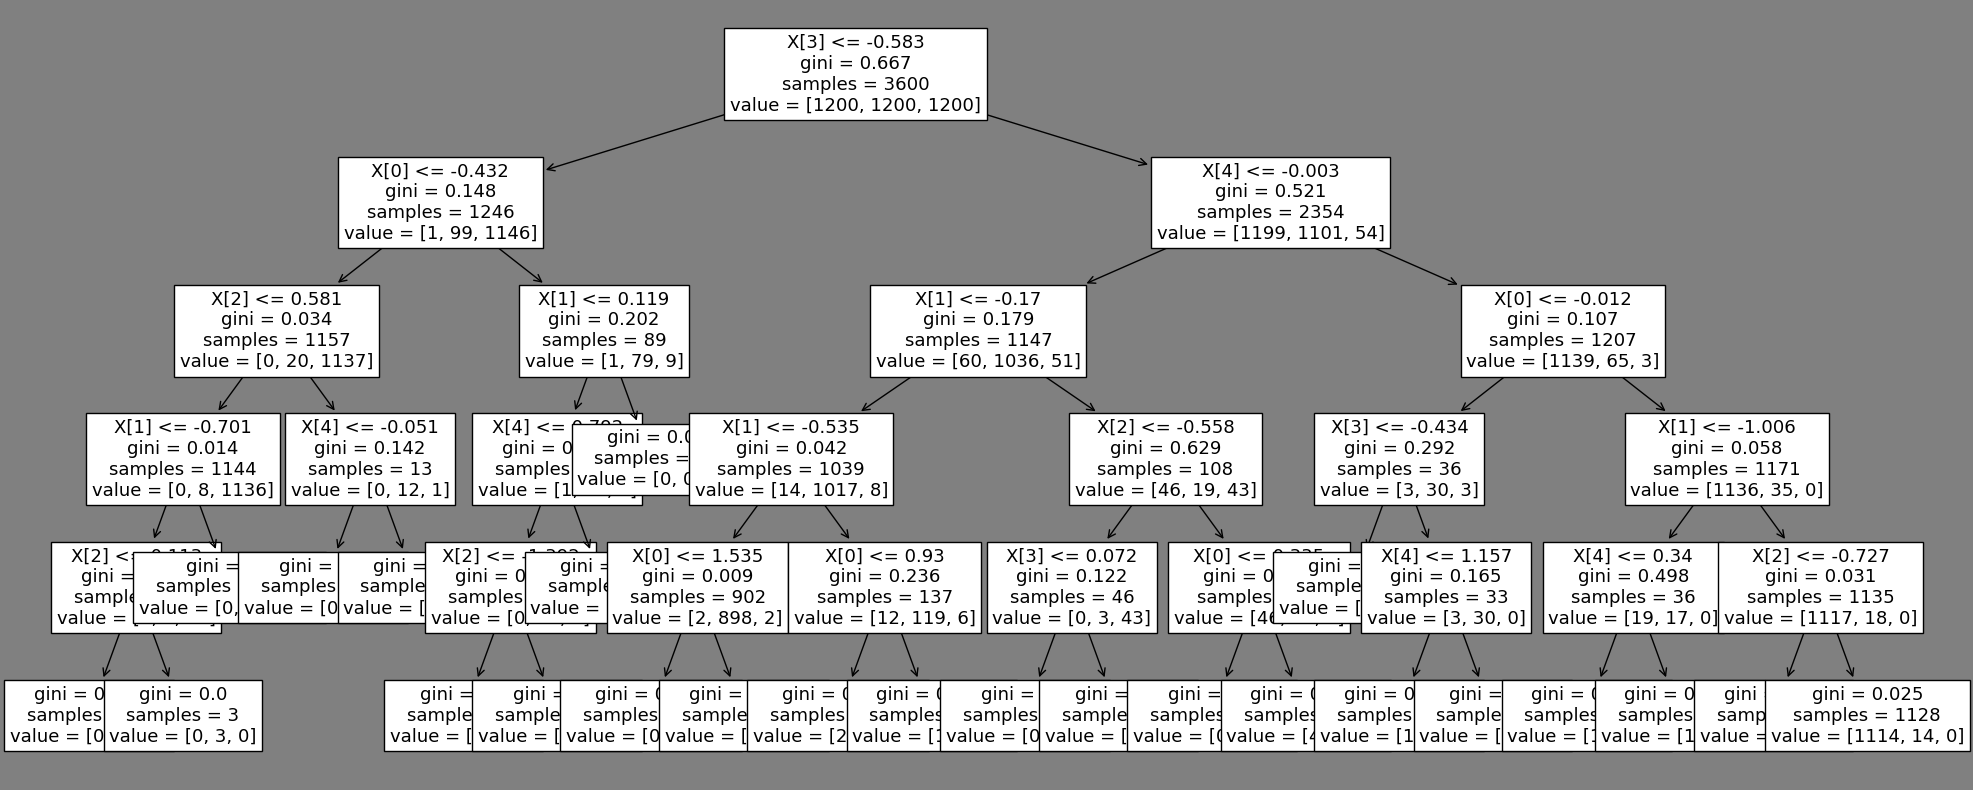

In [25]:
from sklearn import tree
from sklearn.tree import plot_tree

tree_model = tree.DecisionTreeClassifier(max_depth=5)
tree_model.fit(X = X_train, y = y_train)
preds = tree_model.predict(X = X_real)

r_squared_score = tree_model.score(X = X_train, y = y_train)
RMSE = mean_squared_error(preds, y_real)**0.5


print(f'Decision tree\'s Root mean square error: {RMSE}')
print(f'Decision tree\'s R-squared score: {r_squared_score}\n')
print(classification_report(y_true = y_real, y_pred = preds))

plt.figure(figsize = (20,8), facecolor = 'grey')
tree.plot_tree(tree_model, fontsize=13, )
plt.tight_layout()
plt.show()

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 1500, max_features=4, oob_score=True, verbose = 0)
rf_model.fit(X = X_train, y = y_train)
preds = rf_model.predict(X = X_real)

r_squared_score = rf_model.score(X = X_train, y = y_train)
RMSE = mean_squared_error(preds, y_real)**0.5

for x, y in zip(vari_df[vari_df.columns[:-1]], rf_model.feature_importances_):
    print(x, y)

print(f'\nRandom forest\'s Root mean square error: {RMSE}')
print(f'Random forest\'s R-squared score: {r_squared_score}\n')
print(classification_report(y_true = y_real, y_pred = preds))

flavanoids 0.10494995193806078
color intensity 0.118516970028131
hue 0.03129740140037876
OD280/OD315 of diluted wines 0.3881809107444626
proline 0.3570547658889669

Random forest's Root mean square error: 0.2702474937259706
Random forest's R-squared score: 1.0

              precision    recall  f1-score   support

         1.0       0.90      0.97      0.93        59
         2.0       0.97      0.85      0.90        71
         3.0       0.91      1.00      0.95        48

    accuracy                           0.93       178
   macro avg       0.93      0.94      0.93       178
weighted avg       0.93      0.93      0.93       178



## SVM

In [40]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X = X_train, y = y_train)
preds = svm_model.predict(X = X_real)

r_squared_score = svm_model.score(X = X_train, y = y_train)
RMSE = mean_squared_error(preds, y_real)**0.5


print(f'SVM\'s Root mean square error: {RMSE}')
print(f'SVM\'s R-squared score: {r_squared_score}\n')
print(classification_report(y_true = y_real, y_pred = preds))

SVM's Root mean square error: 0.22485950669875843
SVM's R-squared score: 0.9902777777777778

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96        59
         2.0       0.98      0.89      0.93        71
         3.0       0.92      1.00      0.96        48

    accuracy                           0.95       178
   macro avg       0.95      0.96      0.95       178
weighted avg       0.95      0.95      0.95       178



## Neural Networks(ANN)

In [28]:
import tensorflow as tf

In [29]:
# columns['class'] encoder
nn_transformed_df = transformed_df.copy()
nn_transformed_df['class'] = nn_transformed_df['class'].replace([1,2,3], [0,1,2])

nn_real_df = real_df.copy()
nn_real_df[nn_real_df.columns[-1]] = nn_real_df[nn_real_df.columns[-1]].replace([1,2,3], [0,1,2])



nn_train, nn_test = train_test_split(nn_transformed_df, test_size=0.4, random_state=10, stratify = nn_transformed_df['class'])

nn_X_train, nn_y_train = nn_train[nn_train.columns[:-1]].values, nn_train[nn_train.columns[-1]].values
nn_X_test, nn_y_test = nn_test[nn_test.columns[:-1]].values, nn_test[nn_test.columns[-1]].values

nn_X_real = nn_real_df[nn_real_df.columns[:-1]]
nn_y_real = nn_real_df[nn_real_df.columns[-1]]


### 定義plot_history()

In [30]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax1.legend()

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()

  plt.show()

### 定義train_model()

In [31]:
def train_model(X_train_data, y_train_data, num_nodes, dropout_proba, lr, epochs, batch_size):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(units = num_nodes, input_shape = (5, ), activation = 'relu'),
        tf.keras.layers.Dropout(dropout_proba),
        tf.keras.layers.Dense(units = num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_proba),
        tf.keras.layers.Dense(units = 3, activation = 'softmax')
    ])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = nn_model.fit(X_train_data, y_train_data, epochs = epochs, batch_size = batch_size, validation_split = 0.3, verbose = 0)

    return nn_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None

for num_nodes in [32, 64]:
    for dropout_proba in [0, 0.2, 0.4]:
        for lr in [0.005, 0.001, 0.0005, 0.0001]:
            for batch_size in [64, 128, 256]:
                epochs = 100
                print(f'Nodes: {num_nodes}, Dropout prob: {dropout_proba} , Learing rate: {lr}, Batch size: {batch_size}, Epochs: {epochs}')
                model, history = train_model(nn_X_train, nn_y_train, num_nodes, dropout_proba, lr, epochs, batch_size)
                # plot_history(history)
                val_loss = model.evaluate(nn_X_test, nn_y_test)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [35]:
pred = model.predict(nn_X_real)

6/6 [==============================] - 0s 642us/step


In [36]:
prediction = []
for i in range(len(pred)):
  max_num = np.argmax(pred[i])
  prediction.append(max_num)

prediction[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
RMSE = mean_squared_error(prediction, nn_y_real)**0.5

print(f'ANN\'s Root mean square error: {RMSE}\n')
print(classification_report(y_true = nn_y_real, y_pred = prediction))

ANN's Root mean square error: 0.211999576001272

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        59
         1.0       0.98      0.90      0.94        71
         2.0       0.92      1.00      0.96        48

    accuracy                           0.96       178
   macro avg       0.95      0.96      0.96       178
weighted avg       0.96      0.96      0.95       178



## 結論

受限於原始資料筆數過少，僅有不到200筆，所以以上預測皆是利用其平均數與標準差透過常態分佈重複抽樣出之資料，並非原始資料， \
訓練完的模型再以原始資料去做比對，多少可以排除因為資料筆數過少而導致的Overfitting。 \
在上述各種限制之下中，ANN(artifical neural networks)準確度為96%為最準確之模型，其他模型最差也有超過九成的準確度。